<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scaling
>* 스케일링이 왜 필요한가
>* 데이터 준비 (np.column_stack(), np.concatenate())
>* np.ones(), np.zeros()
>* train_test_split()
>* 넘파이 배열 인덱싱
>* 넘파이 브로드캐스팅
>* kneighbors 메서드
>* Data Preprocessing: Scaling

In [2]:
# 데이터 가져오기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [6]:
import numpy as np

# 기존 데이터 리스트 만들던 방식
# fish_data = [[l, w] for l, w in zip (fish_length, fish_height)]

# np.column_stack(): 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
# 연결할 리스트는 파이썬 튜플로 전달

# 튜플(tuple)이란?
# 리스트와 매우 유사하다. 리스트처럼 원소에 순서가 있지만 한 번 만들어진 튜플은 수정할 수 없다.
fish_data = np.column_stack((fish_length, fish_weight))

# 앞에 5개만 뽑아보자
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [8]:
# 동일한 방법으로 target data도 만들어보자.

# 기존 target 만들던 방식
# fish_target = [1] * 35 + [0] * 14

# np.ones(), np.zeros(): 원하는 개수만큼 1 혹은 0을 채워 배열을 만들어주는 함수
# np.concatenate(): 1차원을 따라 배열을 연결하는 함수, column_stack과 마찬가지로 tuple로 전달

fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [12]:
# 사이킷런을 이용하여 train데이터와 test데이터를 split (random으로 섞는 것까지)
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state = 42
)

# 이 함수는 기본적으로 test set으로 전체 데이터에서 25%정도만 떼어낸다.
print(train_input.shape, test_target.shape)

# 도미와 빙어가 잘 섞였는가
print(test_target)
# 두 생선의 비율은 2.5 : 이다. 하지만, 테스트 세트에서 도미와 빙어의 비율이 3.3 : 1이다.
# 이러한 경우 Sampling bias 현상이 나타나 모델이 올바르게 학습할 수 없을 것이다.

# train_test_split 함수에서 stratify 매개변수에 target data를 전달하면 클래스 비율에 맞게 데이터를 나눈다.
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state = 42
)

print(test_target)
# >> 데이터 준비 끝

(36, 2) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# 수상한 도미 한 마리

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [14]:
# 수상한 도미에 대한 분류 값 예측
print(kn.predict([[25, 150]]))

# 빙어로 예측하게 된다.

[0.]


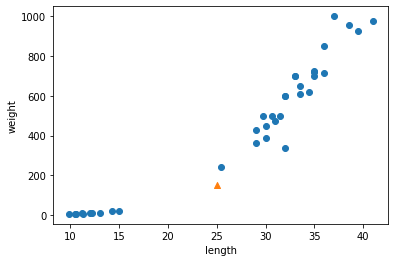

In [17]:
# 산점도(scatter plot)을 그려서 확인

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^') # marker = '^'는 삼각형으로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도로 보아도 다른 도미 데이터에 더 가깝다.

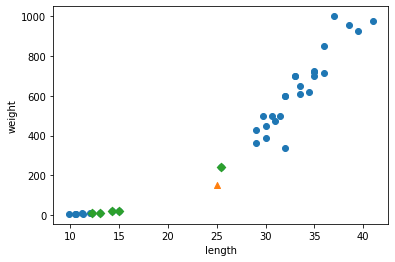

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [22]:
# 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbor() 메서드를 사용해보자.

distances, indexes = kn.kneighbors([[25, 150]])

# indexes 배열을 사용하여 이웃 샘플을 따로 구분하여 scatter plot에 나타내보자.

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
# 넘파이 배열의 인덱싱 사용
# marker = 'D'는 마름모
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 결과 scatter plot을 보면 가장 가까운 이웃 데이터(5개) 중에
# 4개가 빙어, 1개가 도미다.

# 직접 데이터를 확인해보자. (input과 test 둘 다)
print(train_input[indexes])
print(train_target[indexes])

# scatter plot을 직관적으로 보면 가장 가까운 거리를 빙어 4개로 채택하는 것이 이상하다.
# distances 배열을 출력해보자.

print(distances)
# [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
# 이상하다. scatter plot에 나타난 거리에 대한 비율에 비해 거리가 너무 천차만별이다.
# 어림짐작으로 보아도 92 거리 보다 족히 몇 배는 되어 보이지만 거리가 130인 게 이상하다.

# x축의 범위가 좁고, y축의 범위가 그에 비해 너무 넓다.
# 이 때문에 y축에서는 거리가 조금이라도 멀어져도 도미 샘플이 이웃으로 선택되지 못 했던 것이다.

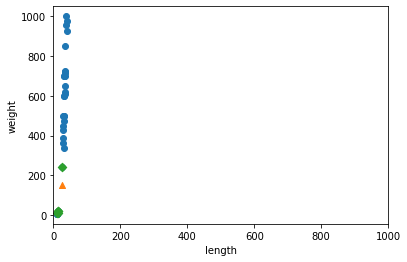

In [23]:
# 이를 눈으로 명확히 눈으로 확인하기 위해 matplotlib에서 x축의 범위를 조절해보자.
# xlim()

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlim((0, 1000)) # << here
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도가 거의 일직선으로 나타난다.
# 확실히 이런 데이터라면 x축은 모델링 하는 데에 있어서 큰 영향을 미치지 못 한다.

# 이를 두 feature의 scale이 다르다고 한다.
# 즉, 데이터를 표현하는 기준이 다르다면 알고리즘이 올바르게 예측 할 수 없다.
# feature 값을 일정한 기준으로 맞춰야 한다. 이런 작업을 Data Preprocessing이라한다.

In [25]:
# 표준점수, Standard Score (Z Score)
# 각 feature 값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.
# standard score = (feature - mean) / std

# 평균, 표준편차를 구하는 함수
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

# 각 feature마다 평균과 표준편차가 구해졌다.
print(mean, std)

# 이제 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 변환
train_scaled = (train_input - mean) / std
# 위 식은 어떻게 계산되는가? 넘파이는 똑똑하게도 train_input의 모든 행에서 mean에 있는
# 두 평균 값을 빼준다. 그다음 std에 있는 표준편차를 모든 행에 적용한다.
# 이런 넘파이 기능을 Broadcasting이라한다.

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


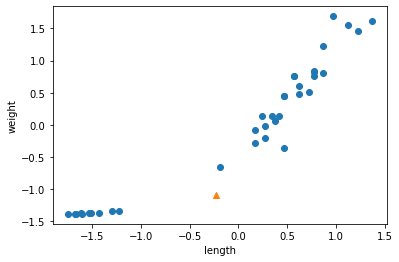

In [26]:
# train_scaled의 scatter plot
plt.scatter(train_scaled[:,0], train_scaled[:,1])

# 수상한 도미 데이터도 전처리 시켜줘야 한다.
new = ([25, 100] - mean) / std
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 산점도는 표준점수로 스케일링한 것과 비슷하다.
# 달라진 점은 두 feature의 범위가 -1.5 ~ 1.5로 비슷해졌다는 것이다.

In [28]:
# 전처리 데이터로 다시 훈련

kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target) # Accuracy = 100%

# 수상한 도미에 대한 predict 값 -> 도미로 분류
print(kn.predict([new]))

[1.]


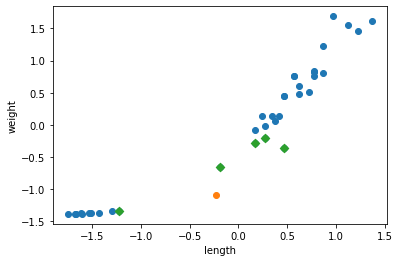

In [30]:
# 마지막으로 kneighbors()함수로 이웃을 구하고, scatter plot을 그려보자.

distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()